In [1]:
## Cell required to run other cells in the file
## Preferably run under py3k env
%pylab inline
import pandas as pd
import h5py
import xarray as xr
import glob, re, os
import scipy
import pickle
import sz
from IPython.core.debugger import Tracer

# Adjust screen output (inline) dpi, default in web is as low as 80
# mpl.rc("savefig", dpi=400)
plt.rcParams['image.cmap'] = 'jet' # Set default colormap to jet
plt.rcParams.update({'font.size': 15}) # Set default fontsize to 20 to accomodate figsize=(11,*)

# import traceback
# import warnings
# import sys
# # warnings.filterwarnings('error')

# def warn_with_traceback(message, category, filename, lineno, file=None, line=None):
#     traceback.print_stack()
#     log = file if hasattr(file,'write') else sys.stderr
#     log.write(warnings.formatwarning(message, category, filename, lineno, line))
## uncomment the following line to have detailed warning info
# warnings.showwarning = warn_with_traceback

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'Bitstream Vera Sans','sans-serif':['Helvetica']})

bin_div = pd.read_hdf('pythondata/hiwcdata.h5',key='bin_div').as_matrix().ravel()
bin_mid = (bin_div[:-1]+bin_div[1:])/2.
bin_diff = np.diff(bin_div)

numofflts = 23
rootpath = '/data/mcfarq/a/szhu28/research/HIWC/data/fulldataDarwin'

'''
rastads = xr.open_dataset('rastacombine.h5')
rawds = rawvar.to_xarray()
## Find duplicate conflict variables and rename the rasta ones
rawkeys = set(rawds.data_vars.keys())
rastakeys = set(rastads.data_vars.keys())
dup = rawkeys.intersection(rastakeys)
renamedict = { dupstr:dupstr+'_rasta' for dupstr in dup}
rastads.rename(renamedict,inplace=True)
rastaraw = xr.merge([rawds,rastads])

# rastaraw.to_netcdf('rasta_raw_cmb.h5',format='NETCDF4',mode='w')
'''
## Read rasta rawvar combined xarray dataset
cmbds = xr.open_dataset('pythondata/rasta_raw_cmb.h5')
rastads = xr.open_dataset('pythondata/rastacombine.h5')
rawpsd = xr.open_dataset('pythondata/psdds.h5')

Populating the interactive namespace from numpy and matplotlib


In [4]:
subset = cmbds.isel(time= (~isnan(cmbds.mu)) & (cmbds.XKBZR5s>1.0) & (cmbds.air_temperature<-15.) )

/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive
/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in less
  if not reflexive


In [ ]:
def f_biarea(bin_div,psd,n0,mu,ld):
    fitted =  n0*bin_mid**mu*exp(-bin_mid*ld)
    pass

def f_biind(n0,mu,ld,bm, n02,mu2,ld2,bm2):
    pass

/data/keeling/a/szhu28/usr/anaconda2/envs/py3k/lib/python3.5/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in greater
  if not reflexive


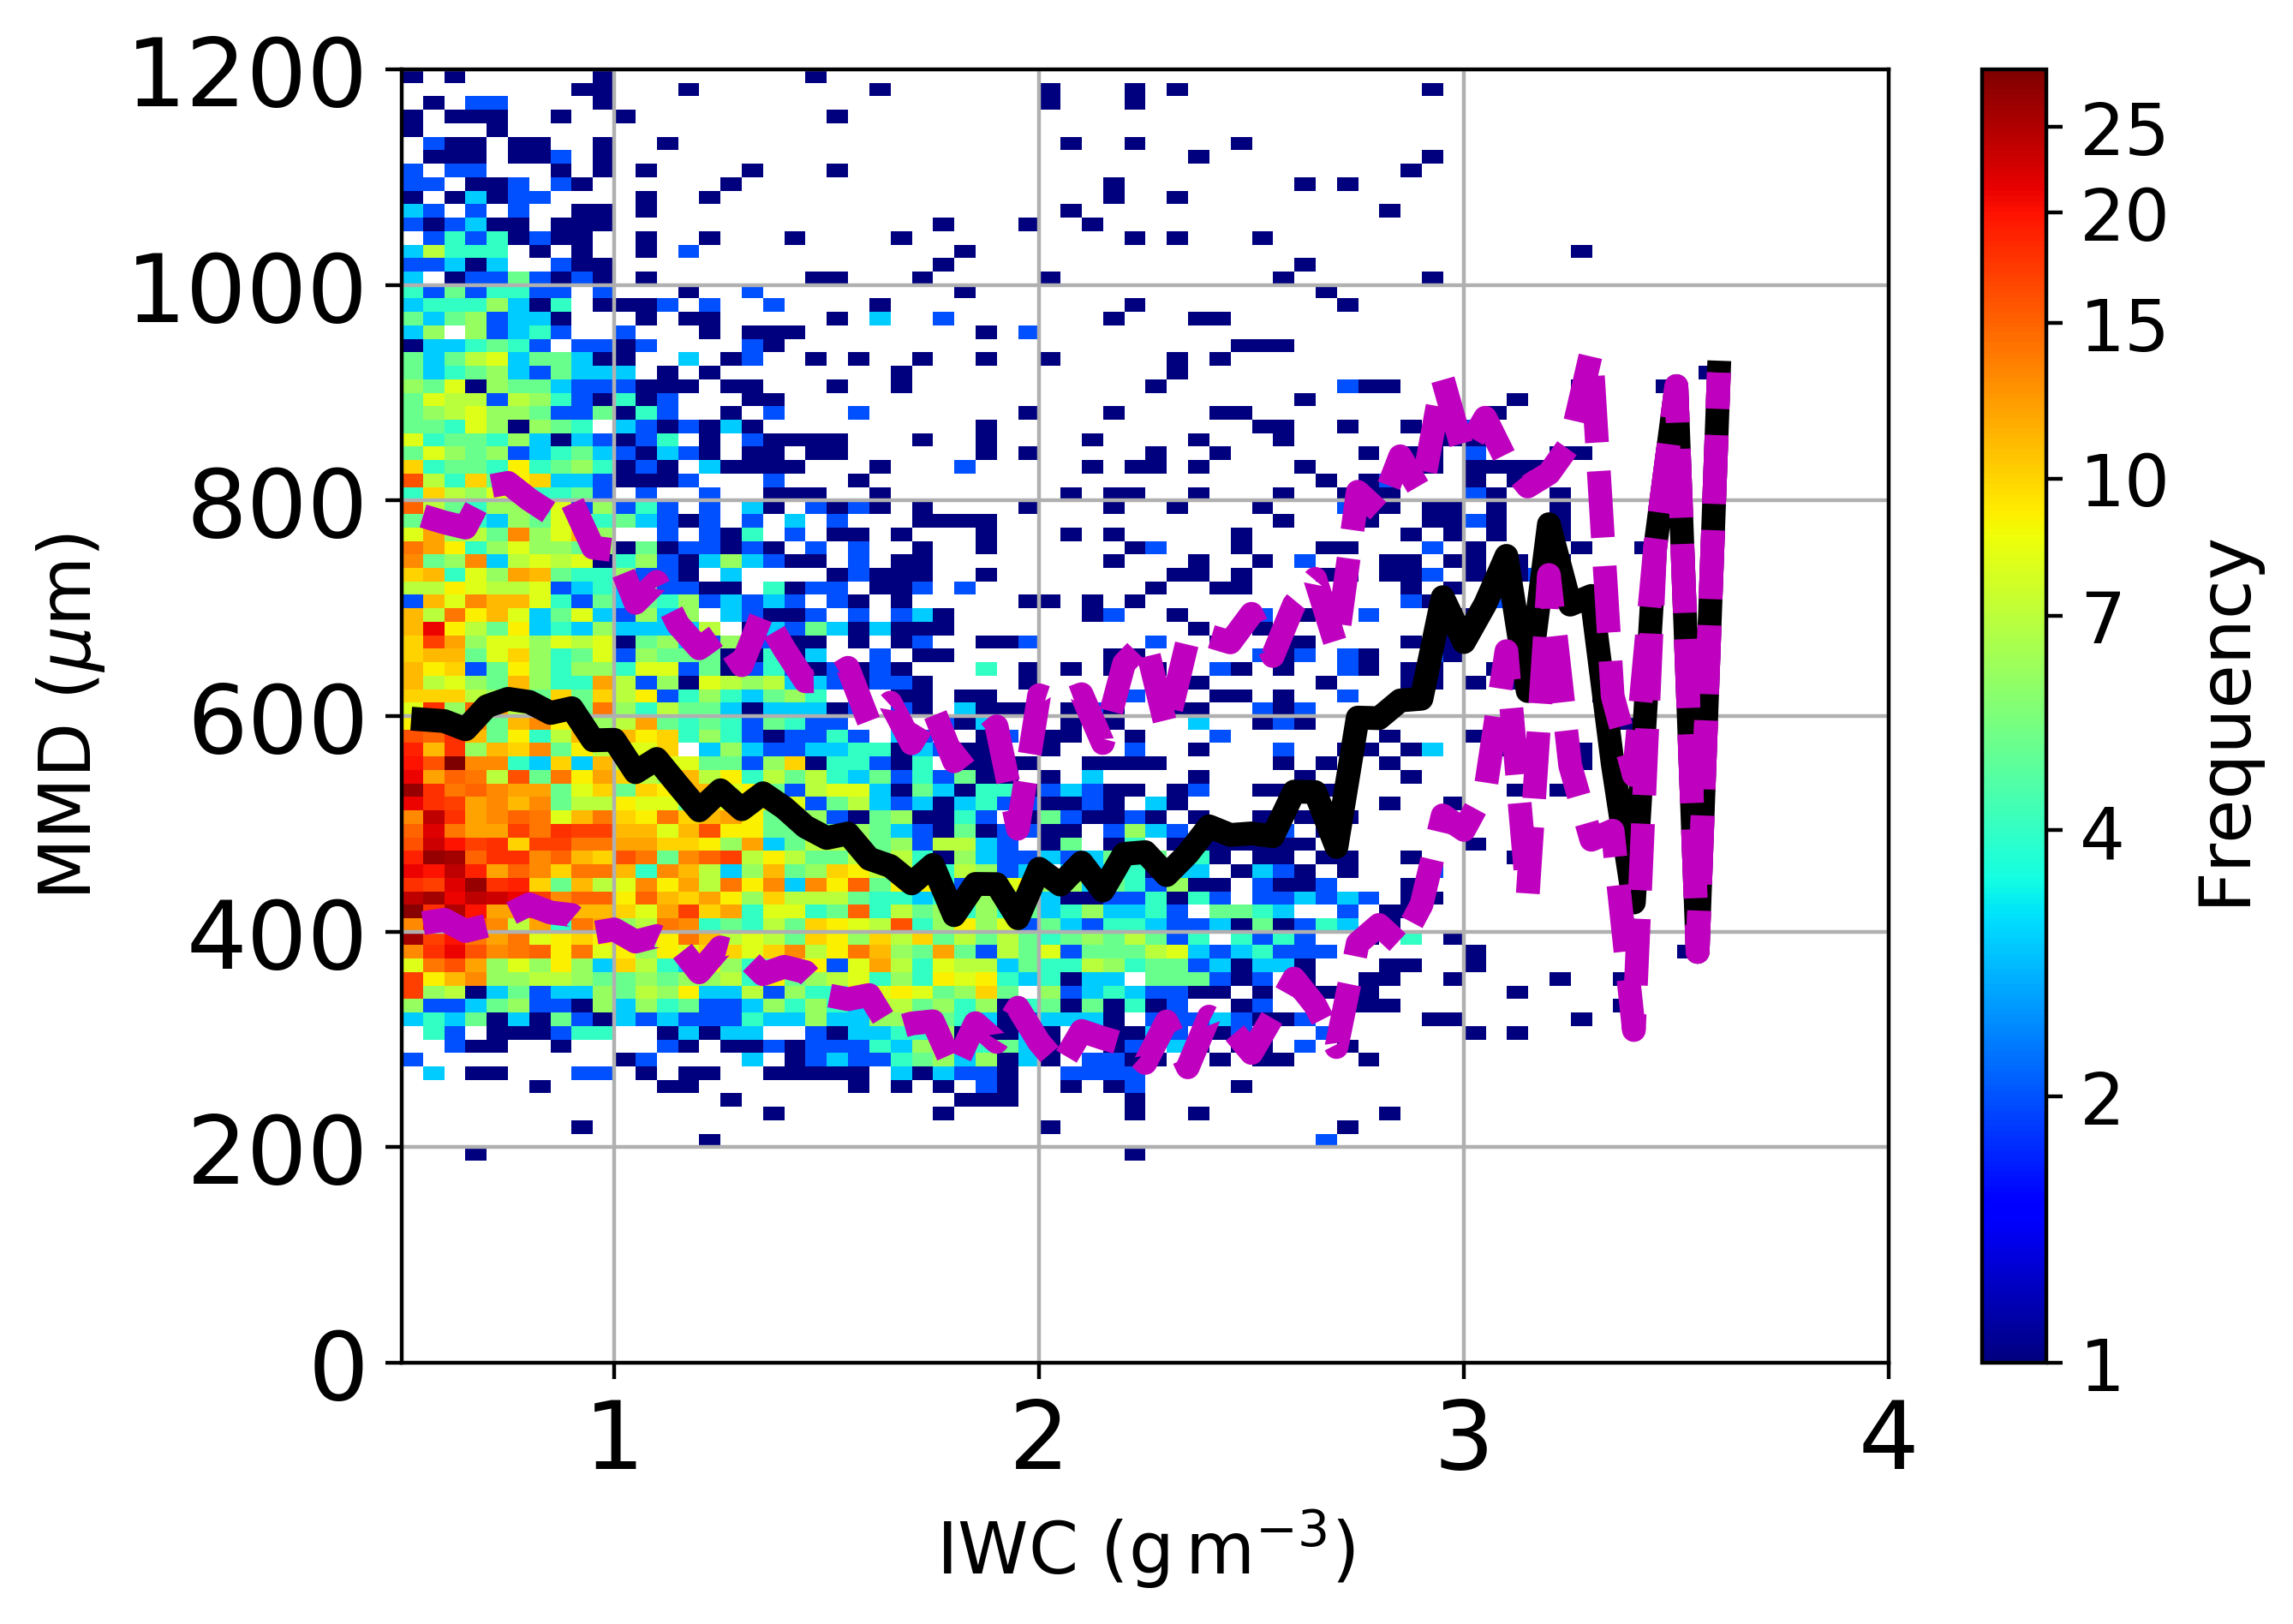

In [13]:
iwc = cmbds.XKBZR5s
rawvar = cmbds
ind = (iwc>0.5) & (~isnan(rawvar['mmd']))
tmpiwc = iwc[np.array(ind)]
mmd = cmbds.mmd[ind]
# any(isnan(mmd))

plt.figure(figsize=(7,5))
from matplotlib.colors import LogNorm
reso = 8
# output = plt.hist2d(tmpiwc,mmd,range=[[0.5,4.5],[0,1200]],bins=np.array([10,12])*5,norm=LogNorm(),cmin=3)
output = plt.hist2d(tmpiwc,mmd,range=[[0.5,4.5],[0,1200]],bins=np.array([10,12])*reso,norm=LogNorm())
# counts,ybins,xbins,image = plt.hist2d(tmpiwc,mmd,range=[[0.5,4.5],[0,1200]],bins=np.array([10,12])*5,norm=LogNorm(),cmin=3)
# plt.clf()
# plt.contourf(counts.transpose(),extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()])
cb = plt.colorbar()
cb.set_label('Frequency')
clabellist = [1,2,4,7,10,15,20,25]
cb.set_ticks(clabellist, update_ticks=True)
cb.set_ticklabels(clabellist)
plt.grid(b=True)
plt.xlabel('IWC (g$\,\mathrm{m}^{-3}$)')
plt.ylabel('MMD ($\mu$m)')

import numpy.ma as ma
iwcmmdct = output[0].transpose()
f = output[2]
f = (f[:-1]+f[1:])/2.
x = output[1][1:]
marray = ma.masked_array(iwcmmdct,isnan(iwcmmdct))
meanval = ma.average(tile(f,[10*reso,1]).transpose(),axis=0,weights=marray)
meanstd = ma.sqrt(ma.average((tile(f,[10*reso,1]).transpose()-meanval)**2,axis=0,weights=marray))
gca().tick_params(labelsize=20)
plt.plot(x,meanval,'k-',lw=5)
plt.plot(x,meanval+meanstd,'m--',lw=5)
plt.plot(x,meanval-meanstd,'m--',lw=5)
plt.xlim(.5,4.0)
meanval[2],meanstd[2]
plt.savefig('tmpfig/freqiwcmmd.jpg', format='jpg',bbox_inches='tight', dpi=400)